# ETL and EDA Using Alteryx

***

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("mod4_peer_rev_data.csv", parse_dates=["Date"])

In [3]:
df

,Date,Department,Category,CustomerCode,Price,Quantity
0,2016-01-14,Kabobs,Pork,CWM11331L8O,28.00,11.00
1,2016-07-02,Sides,Rice,CWM11331L8O,9.00,5.00
2,2014-07-09,Sides,Rice,CXP4593H7E,9.00,14.00
3,2014-09-10,Sides,Rice,CWM11331L8O,9.00,6.00
4,2015-04-28,Kabobs,Beef,CWM11331L8O,25.00,7.00
...,...,...,...,...,...,...
34427,2016-09-01,Sides,Rice,CWM11331L8O,9.00,11.00
34428,2014-11-12,Kabobs,Chicken,CWM11331L8O,33.00,7.00
34429,2017-01-26,Kabobs,Beef,CWM11331L8O,28.00,6.00
34430,2014-07-06,Entrees,Beef and Broccoli,CWM11331L8O,15.00,15.00


Transform columns so that datatypes are appropriate. Specifically ensure that the CustomerCode variable is formatted as character, any other categorical variable is set as factor, and date column is set as a date type (Date/POSIXIt/POSIXct)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34432 entries, 0 to 34431
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          34432 non-null  datetime64[ns]
 1   Department    34432 non-null  object        
 2   Category      34432 non-null  object        
 3   CustomerCode  34432 non-null  object        
 4   Price         34422 non-null  float64       
 5   Quantity      34425 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.6+ MB


Display and interpret the summaries for the Quantity and Price columns

In [5]:
df.describe()

,Price,Quantity
count,34422.00,34425.00
mean,22.81,11.31
std,9.72,4.71
min,3.00,1.00
25%,12.00,8.00
50%,25.00,11.00
75%,33.00,15.00
max,50.00,24.00


Display the count of NA values in each column.

In [6]:
df.isnull().sum()

Date             0
Department       0
Category         0
CustomerCode     0
Price           10
Quantity         7
dtype: int64

Display a bar chart for Category column.

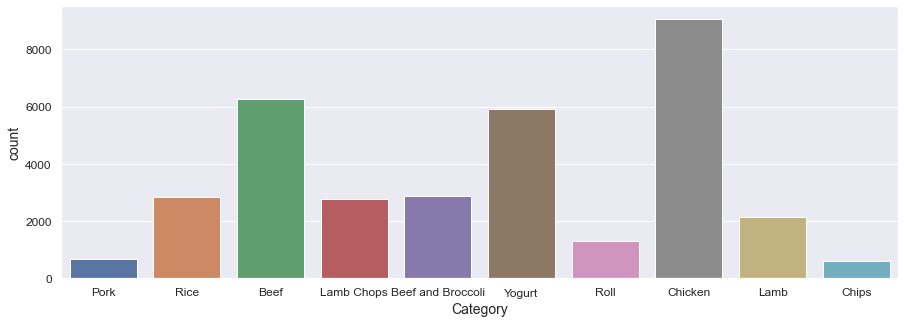

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x=df.Category)
plt.show()

Display the Departments and their revenue using a bar chart. Order the bars in a meaningful way. 4 points. (Hint: You will need to create a new column Revenue by multiplying Price and Quantity.)

In [8]:
df.head()

,Date,Department,Category,CustomerCode,Price,Quantity
0,2016-01-14,Kabobs,Pork,CWM11331L8O,28.00,11.00
1,2016-07-02,Sides,Rice,CWM11331L8O,9.00,5.00
2,2014-07-09,Sides,Rice,CXP4593H7E,9.00,14.00
3,2014-09-10,Sides,Rice,CWM11331L8O,9.00,6.00
4,2015-04-28,Kabobs,Beef,CWM11331L8O,25.00,7.00


In [9]:
df["Revenue"] = df["Price"] * df["Quantity"]

In [10]:
df.head()

,Date,Department,Category,CustomerCode,Price,Quantity,Revenue
0,2016-01-14,Kabobs,Pork,CWM11331L8O,28.00,11.00,308.00
1,2016-07-02,Sides,Rice,CWM11331L8O,9.00,5.00,45.00
2,2014-07-09,Sides,Rice,CXP4593H7E,9.00,14.00,126.00
3,2014-09-10,Sides,Rice,CWM11331L8O,9.00,6.00,54.00
4,2015-04-28,Kabobs,Beef,CWM11331L8O,25.00,7.00,175.00


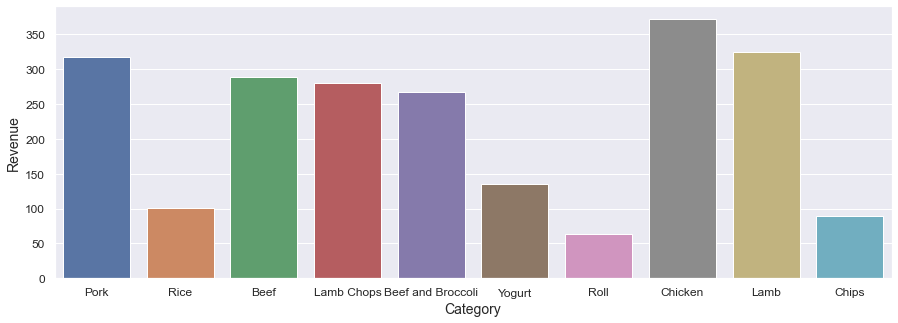

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x=df.Category, y=df.Revenue, data=df, ci=None)
plt.show()

Create a histogram and box and whisker plot of the Price and Quantity columns. 

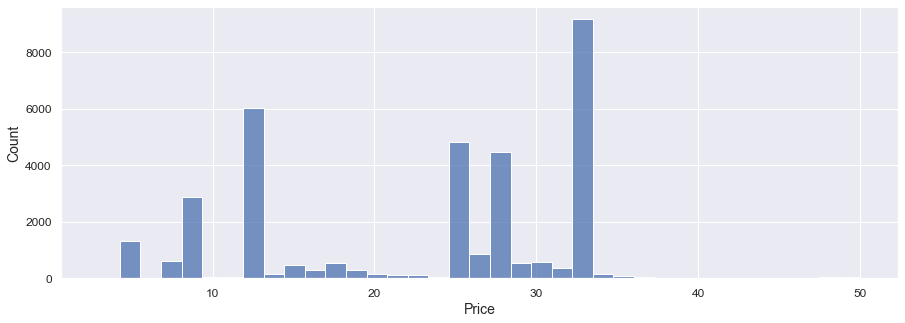

In [12]:
plt.figure(figsize=(15,5))
sns.histplot(x=df["Price"])
plt.show()

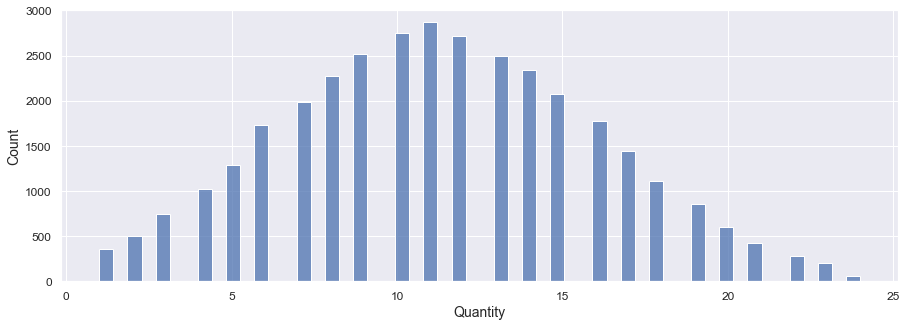

In [13]:
plt.figure(figsize=(15,5))
sns.histplot(x=df["Quantity"])
plt.show()

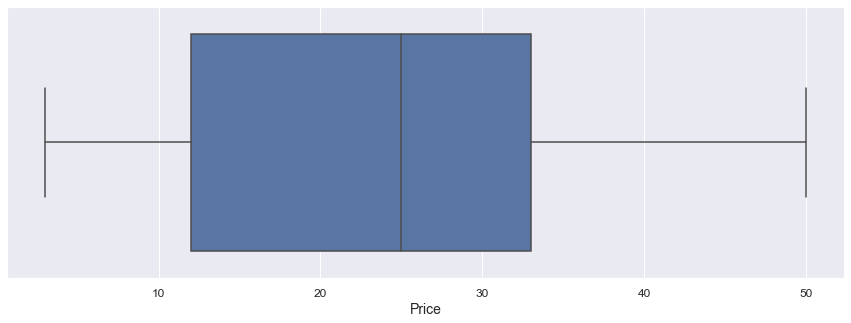

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df["Price"])
plt.show()

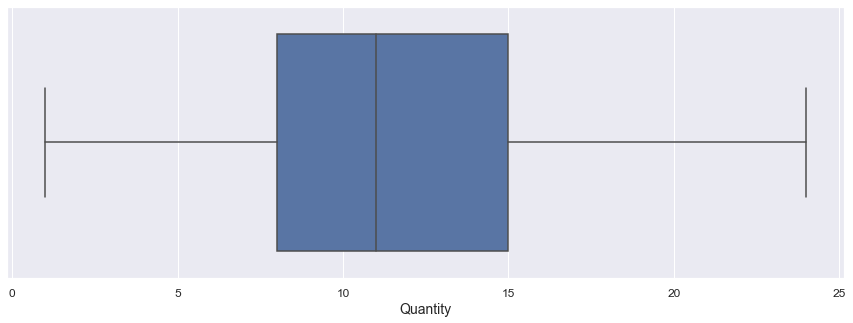

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df["Quantity"])
plt.show()

Write a short essay (150-200 words) to compare the strengths and weaknesses of (1) Power BI and (2) Alteryx with that of R, for this kind of analysis. You may discuss how each of these fare in terms of replicability, ease of use, cost, ability to share results with others, scalability, etc. 

PowerBI = GUI Based, Easy to learn but DAX is tough. Cost is free unless need full version. Can share reports online.

Alteryx = GUI Based, Hard to replicate due to propritery software. Not free. Report sharing is limited.

R = Text Based, Hardest to learn and use. Freeware at no cost. Share results easily with users.

#### Python code done by Dennis Lam